# Cancer Detection

Dataset Source: https://www.kaggle.com/datasets/yusufdede/lung-cancer-dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.Knowing the Data

In [2]:
df = pd.read_csv('Cancer_dataset.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
df.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [5]:
df.shape

(59, 7)

## 2.Missing values Treatement 

In [6]:
df.isnull().sum()/100

Name       0.0
Surname    0.0
Age        0.0
Smokes     0.0
AreaQ      0.0
Alkhol     0.0
Result     0.0
dtype: float64

In [7]:
df.dtypes

Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object

## 3.EDA

<AxesSubplot:>

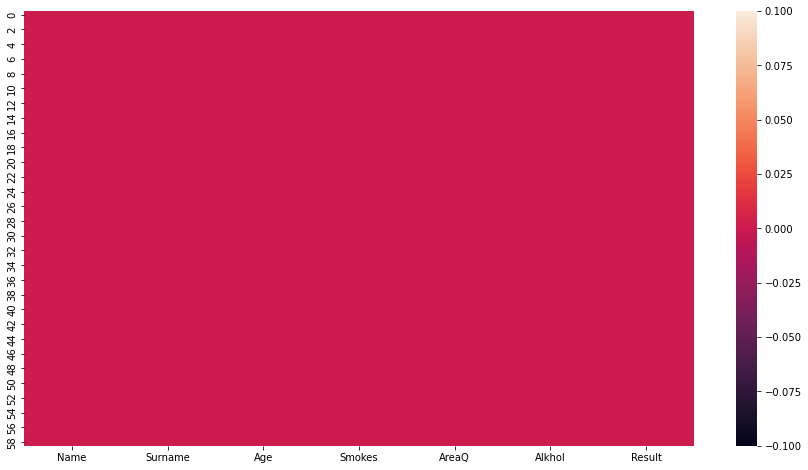

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [9]:
df.drop(['Name','Surname'],axis=1,inplace=True)

In [10]:
df.columns

Index(['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

<AxesSubplot:>

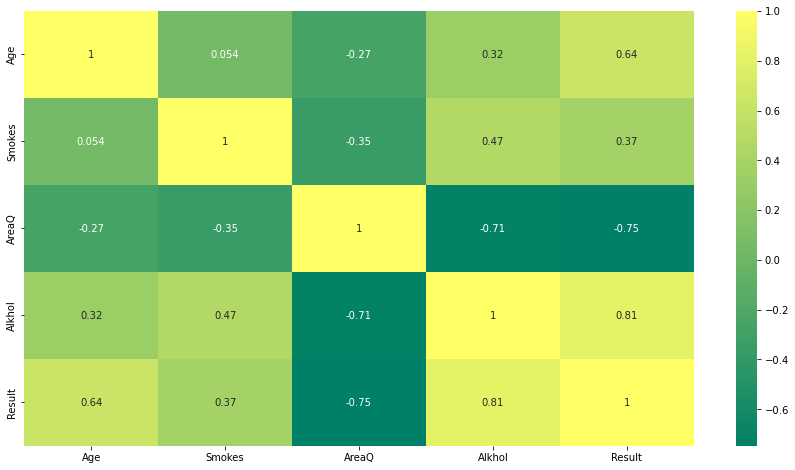

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='summer')

## 3.Spliting the dataset into X and Y

In [12]:
X=df.drop('Result',axis=1)
Y=df['Result']

In [13]:
X

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6
5,34,0,10,0
6,58,15,10,0
7,22,12,5,2
8,45,2,6,0
9,52,18,4,5


In [14]:
Y

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    1
15    0
16    1
17    0
18    1
19    1
20    1
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    1
38    0
39    0
40    1
41    0
42    1
43    1
44    0
45    0
46    0
47    0
48    1
49    1
50    0
51    1
52    1
53    0
54    0
55    1
56    1
57    1
58    0
Name: Result, dtype: int64

## 4.Train Test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=101)

In [16]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(41, 4)
(41,)
(18, 4)
(18,)


## 5.Model Creation

### 5.1)Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
Y_pred=dt.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of DecisionTree Classifier is:",accuracy*100)

Accuracy of DecisionTree Classifier is: 94.44444444444444


### 5.2)Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
Y_pred=dt.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of RandomForest Classifier is:",accuracy*100)

Accuracy of RandomForest Classifier is: 100.0


## 6.Confusion Matrix

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(Y_test, Y_pred)

array([[9, 0],
       [0, 9]], dtype=int64)

In [25]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

